# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [1]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

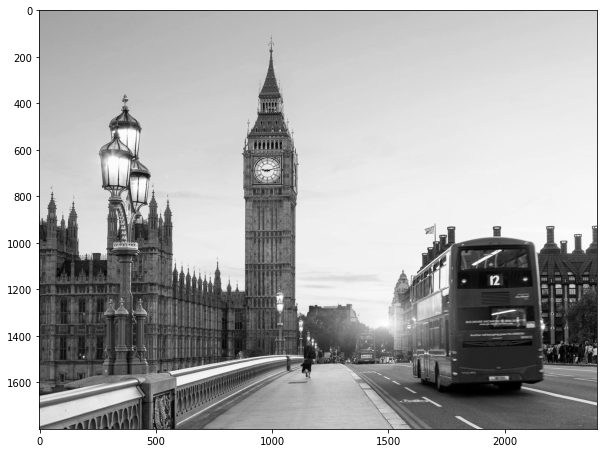

In [2]:
# Read the image (provided)
image = imageio.imread('london.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

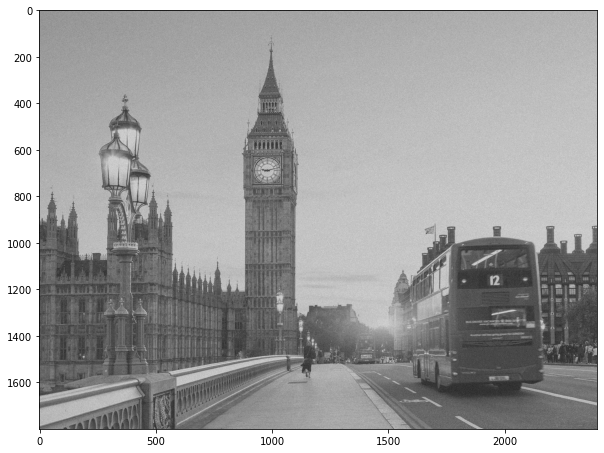

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


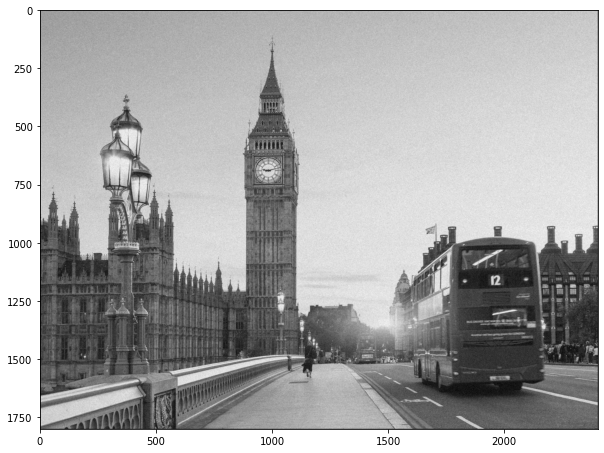

In [4]:
# Design the filter h
h = np.ones((3,3))/9

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

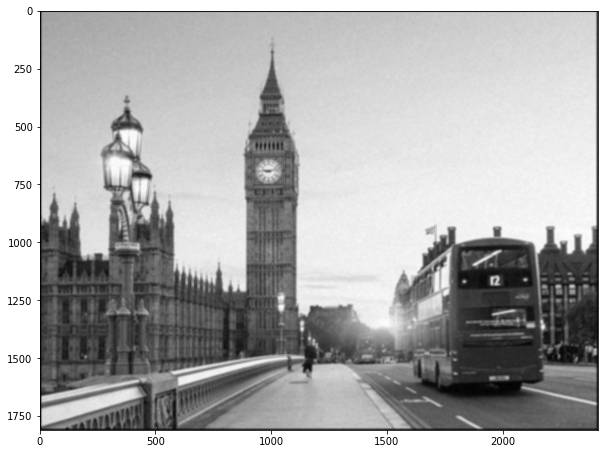

In [5]:
# Design the filter h
h = np.ones((11,11))/121

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

The 11x11 filtered image has noticeably much more blur than the 3x3 filtered image. This is because the moving average filter replaces each pixel with the average pixel value of its adjacent neighbours. This causes the image to become smoother with sharp features less defined. The larger the kernel size, the more values will be factored into the average. This will blur the image more compared to a smaller kernel.

## 2. Edge detection (65 points).

Perform edge detection using Sobel filters, as well as Gaussian + Sobel filters for edge detection.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image. (10 points)

h_sobel_x:
[[1, 0, -1], [2, 0, -2], [1, 0, -1]]
h_sobel_y:
[[1, 2, 1], [0, 0, 0], [-1, -2, -1]]


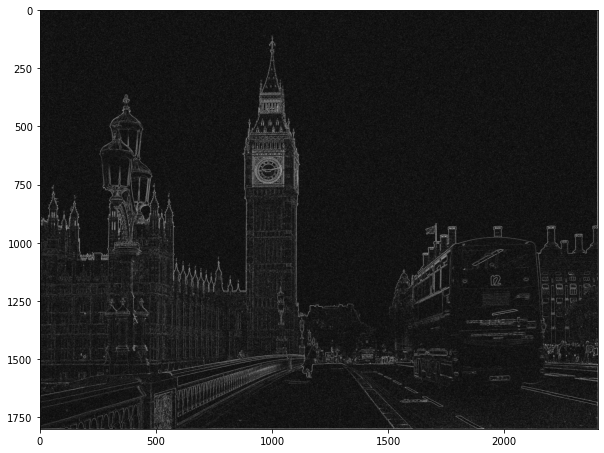

In [6]:
# Design the Sobel filters
h_sobel_x = [[1, 0, -1],
             [2, 0, -2],
             [1, 0, -1]]
h_sobel_y = [[1, 2, 1],
             [0, 0, 0],
             [-1, -2, -1]]

# Sobel filtering
g_x = scipy.signal.convolve2d(image_noisy, h_sobel_x)
g_y = scipy.signal.convolve2d(image_noisy, h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.hypot(g_x, g_y)

# Print the filters (provided)
print('h_sobel_x:')
print(h_sobel_x)
print('h_sobel_y:')
print(h_sobel_y)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

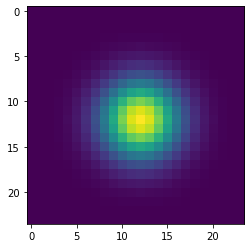

In [7]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    k = 4
    size = sigma * k
    x = np.arange(-size, size, 1)
    y = np.arange(-size, size, 1)
    
    x2d, y2d = np.meshgrid(x, y) 

    g = np.exp(-(np.square(x2d) + np.square(y2d)) / (2 * (sigma ** 2)))
    h = g / (2 * np.pi * (sigma ** 2))
    
    return h

# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Sobel filtering, show the gradient magnitude image. (7 points)

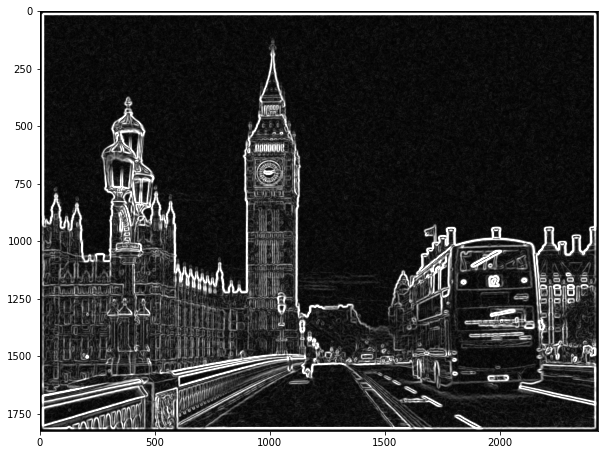

In [8]:
# Perform Gaussian smoothing before Sobel filtering
image_smoothed = scipy.signal.convolve2d(image_noisy, h)

# Sobel filtering
h_sobel_x = [[1, 0, -1],
             [2, 0, -2],
             [1, 0, -1]]
h_sobel_y = [[1, 2, 1],
             [0, 0, 0],
             [-1, -2, -1]]

g_x = scipy.signal.convolve2d(image_smoothed, h_sobel_x)
g_y = scipy.signal.convolve2d(image_smoothed, h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.hypot(g_x, g_y)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering. (9 points)

Time taken: 29.97962713241577s


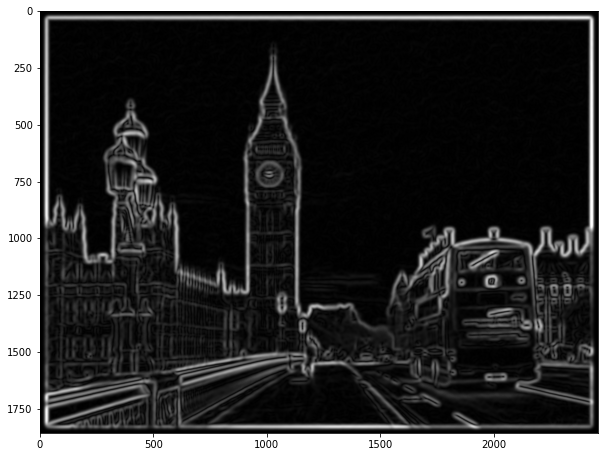

In [9]:
# Construct the Gaussian filter
sigma = 7
h = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing and count time
start = time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h)
end = time.time()
print("Time taken: {}s".format(end - start))

# Sobel filtering
h_sobel_x = [[1, 0, -1],
             [2, 0, -2],
             [1, 0, -1]]
h_sobel_y = [[1, 2, 1],
             [0, 0, 0],
             [-1, -2, -1]]

g_x = scipy.signal.convolve2d(image_smoothed, h_sobel_x)
g_y = scipy.signal.convolve2d(image_smoothed, h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.hypot(g_x, g_y)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

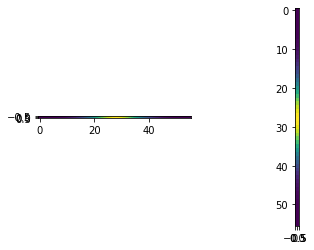

In [10]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    k = 4
    size = sigma * k
    x = np.arange(-size, size, 1)

    g = np.exp(-np.square(x) / (2 * (sigma ** 2)))
    h = g / (np.sqrt(2 * np.pi) * sigma)
    return h

# sigma = 7 pixel (provided)
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = np.expand_dims(gaussian_filter_1d(sigma), 0)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = np.vstack(gaussian_filter_1d(sigma))

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing (sigma = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering and show results. (9 points)

Time taken: 1.6256980895996094s


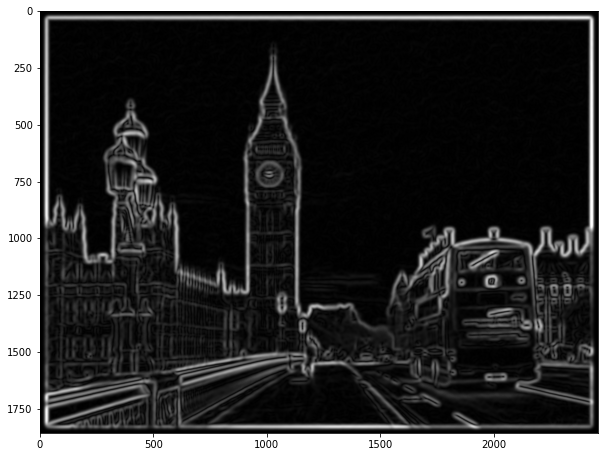

In [11]:
# Perform separable Gaussian smoothing and count time
start = time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h_x)
image_smoothed = scipy.signal.convolve2d(image_smoothed, h_y)
end = time.time()
print("Time taken: {}s".format(end - start))

# Sobel filtering
h_sobel_x = [[1, 0, -1],
             [2, 0, -2],
             [1, 0, -1]]
h_sobel_y = [[1, 2, 1],
             [0, 0, 0],
             [-1, -2, -1]]

g_x = scipy.signal.convolve2d(image_smoothed, h_sobel_x)
g_y = scipy.signal.convolve2d(image_smoothed, h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.hypot(g_x, g_y)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time. (10 points)

Sigma in the Gaussian filter controls the variation around its mean, which affects the edge detection of the image. If sigma is smaller (3px), the edges will be thinner. However, there is also less noise suppression of the image, which causes the edges to be sharper. If sigma is larger (7px), the edges are thicker, but there is a greater extent of noise suppression which creates a smoothing effect of the edges.

Computational time using a 2D Gaussian filter directly is approximately 28.46s. This is almost 18 times slower than convoluting two 1D separable filters (1.61s). Utilising the separable filters results in a lower computational complexity, as the total number of operations that are required to be executed on each individual pixel is reduced by a factor of 56, which corresponds to twice of k (chosen as 4) times sigma, or the kernel width.

## 3. Challenge: Implement the 3x3 moving average filter using Pytorch. (15 points)

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [12]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (5 points)

In [13]:
# Expand the dimension of the numpy array
image_expanded = np.expand_dims(image_noisy, axis=(0, 1))

# Convert to a Pytorch tensor using torch.from_numpy
image_tensor = torch.from_numpy(image_expanded)

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 3x3 moving averaging filter. (5 points)

In [14]:
# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)

# Set the kernel weight
h = np.ones((3,3))/9
h_expanded = np.expand_dims(h, axis=(0, 1))
weights = torch.tensor(h_expanded)
conv.weight = torch.nn.Parameter(weights)

### 3.3 Apply the filter to the noisy image tensor and display the output image. (5 points)

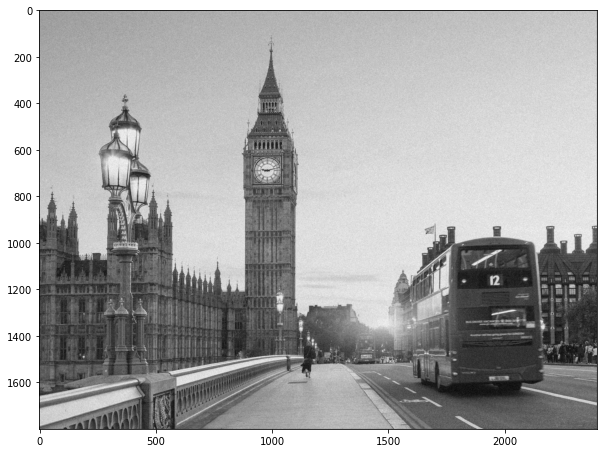

In [15]:
# Filtering
output_tensor = conv(image_tensor)
output_expanded = output_tensor.detach().numpy()
image_filtered = np.squeeze(output_expanded, axis=(0, 1))

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

## 4. Survey: How long does it take you to complete the coursework?

~2 hours